In [1]:
clear all
cd matlab
pwd
format compact; setappdata(0, "MKernel_plot_format", 'svg')
open dtm_ex1_2


ans =

    '/Users/eechris/code/src/github.com/cpjobling/eg-247-textbook/dt_systems/4/matlab'



In [2]:
Nz = [1 1 0];

In [3]:
Dz = [1 -0.5 0.125];

In [4]:
[r,p,k] = residue(Nz,Dz)

r =
   0.7500 - 0.5000i
   0.7500 + 0.5000i
p =
   0.2500 + 0.2500i
   0.2500 - 0.2500i
k =
     1


In [5]:
Hz = tf(Nz,Dz,1)
hn = impulse(Hz, 15);


Hz =
 
        z^2 + z
  -------------------
  z^2 - 0.5 z + 0.125
 
Sample time: 1 seconds
Discrete-time transfer function.


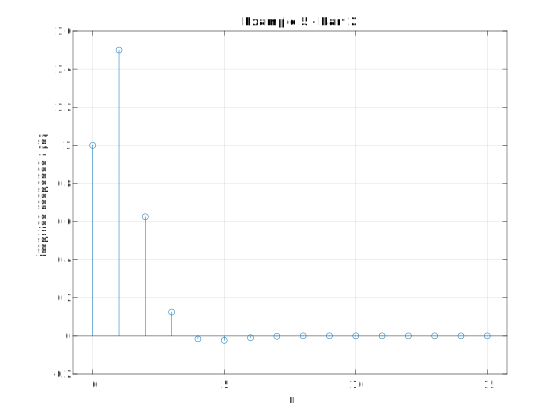

In [6]:
stem([0:15], hn)
grid
title('Example 5 - Part 2')
xlabel('n')
ylabel('Impulse response h[n]')

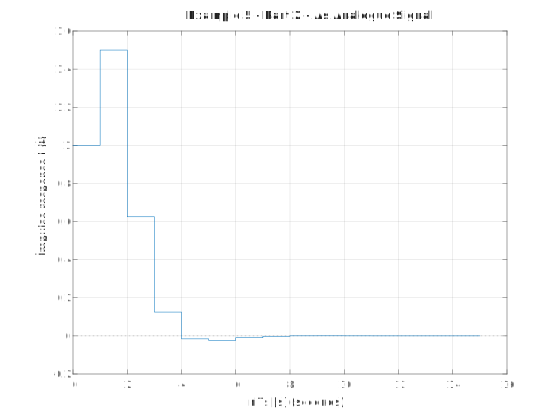

In [7]:
impulse(Hz,15)
grid
title('Example 5 - Part 2 - As Analogue Signal')
xlabel('nTs [s]')
ylabel('Impulse response h(t)')

In [8]:
open dtm_ex1_3

In [9]:
Ts = 1;
z = tf('z', Ts);

In [10]:
Hz = (z^2 + z)/(z^2 - 0.5 * z + 0.125)


Hz =
 
        z^2 + z
  -------------------
  z^2 - 0.5 z + 0.125
 
Sample time: 1 seconds
Discrete-time transfer function.


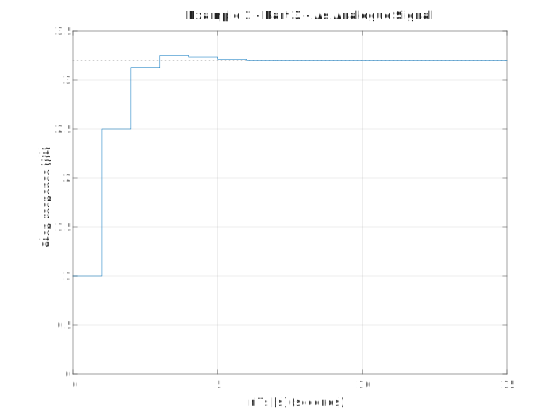

In [11]:
step(Hz)
grid
title('Example 1 - Part 3 - As Analogue Signal')
xlabel('nTs [s]')
ylabel('Step response y(t)')
axis([0,15,0,3.5])

In [12]:
dtm

In [13]:
help c2d

 c2d - Convert model from continuous to discrete time
    This MATLAB function discretizes the continuous-time dynamic system
    model sysc using zero-order hold on the inputs and a sample time of Ts.

    Syntax
      sysd = c2d(sysc,Ts)
      sysd = c2d(sysc,Ts,method)
      sysd = c2d(sysc,Ts,opts)
      [sysd,G] = c2d(___)

    Input Arguments
      sysc - Continuous-time dynamic system
        dynamic system model
      Ts - Sample time
        positive scalar
      method - Discretization method
        'zoh' (default) | 'foh' | 'impulse' | 'tustin' | 'matched' |
        'least-squares' | 'damped'
      opts - Discretization options
        c2dOptions object

    Output Arguments
      sysd - Discrete-time model
        dynamic system model
      G - Mapping of continuous initial conditions of state-space model to discrete-time initial state vector
        matrix

    Examples
      openExample('controls_id/DiscretizeATransferFunctionExample')
      openExample('controls_id/Disc

In [14]:
doc c2d

In [15]:
wc = 2*pi*20e3

wc =
   1.2566e+05


In [16]:
Hs = tf(wc^2,[1 wc*sqrt(2), wc^2])


Hs =
 
           1.579e10
  ---------------------------
  s^2 + 1.777e05 s + 1.579e10
 
Continuous-time transfer function.


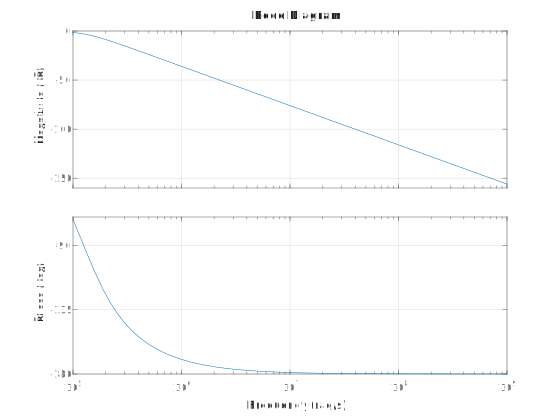

In [17]:
doc bode
bode(Hs,{10e4,10e8})
grid

In [18]:
w_stop = 100*wc

w_stop =
   1.2566e+07


In [19]:
ws = 2* w_stop

ws =
   2.5133e+07


In [20]:
fs = ws/(2*pi)

Error using /
Arguments must be numeric, char, or logical.


In [21]:
Ts = 1/fs

Unrecognized function or variable 'fs'.


In [22]:
Hz = c2d(Hs, Ts)


Hz =
 
  1
  -
  z
 
Sample time: 1 seconds
Discrete-time transfer function.


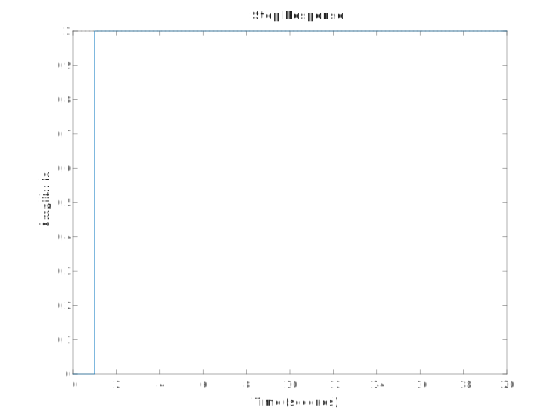

In [23]:
step(Hz)

In [24]:
open digifilter